In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Διαβάζω το dataset από το drive μου

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/newsbeast.csv')

In [ ]:
df.head()

,Title,Url,Article_content,Media,Author,Lead,Section,Datetime
0,Κροατική τηλεόραση για επεισόδια στη Νέα Φιλαδ...,https://www.newsbeast.gr/society/arthro/993755...,\nΡεπόρτερ που βρίσκεται στην Ελλάδα και καλύπ...,False,Newsroom,Κροατική τηλεόραση για επεισόδια στη Νέα Φιλαδ...,ΚΟΙΝΩΝΙΑ,10/08/2023 19:27
1,Συναγερμός στην Κέρκυρα για ύποπτο δέμα στο κέ...,https://www.newsbeast.gr/society/arthro/993750...,\nΚλειστή είναι η Λ. Αλεξάνδρας στο κέντρο της...,False,NaN,Συναγερμός στην Κέρκυρα για ύποπτο δέμα στο κέ...,ΚΟΙΝΩΝΙΑ,10/08/2023 19:04
2,Αγόρασε κόσμημα 1.300 ευρώ με πλαστό αποδεικτι...,https://www.newsbeast.gr/society/arthro/993731...,\nΤο Τμήμα Ασφάλειας Έδεσσας αποκάλυψε μια υπό...,False,Newsroom,Αγόρασε κόσμημα 1.300 ευρώ με πλαστό αποδεικτι...,ΚΟΙΝΩΝΙΑ,10/08/2023 18:23
3,Τραγωδία στους Φούρνους Ικαρίας: Γιος του Οδυσ...,https://www.newsbeast.gr/society/arthro/993740...,\nΈνα αγόρι μόλις 11 ετών ανασύρθηκε νεκρό από...,False,Newsroom,Τραγωδία στους Φούρνους Ικαρίας: Γιος του Οδυσ...,ΚΟΙΝΩΝΙΑ,Upd: 10/08/2023 21:06
4,Συγκλονίζει τραυματίας από τη Νέα Φιλαδέλφεια:...,https://www.newsbeast.gr/society/arthro/993735...,\nΣυγκλονιστική είναι η περιγραφή που έδωσε τρ...,False,Newsroom,Συγκλονίζει τραυματίας από τη Νέα Φιλαδέλφεια:...,ΚΟΙΝΩΝΙΑ,10/08/2023 17:54


Καθαρίζω τις στήλες Title, Article_content από na values

In [3]:
df = df.dropna(subset=['Title'])
df = df.dropna(subset=['Article_content'])

Συγχωνεύω τις στήλες 'title', 'full_text' σε μια στήλη text η οποία δηλαδή θα περιέχει το συνολικό κομμάτι κειμένου που περιέχεται σε κάθε άρθρο

In [4]:
df['text'] = df[['Title', 'Article_content']].agg('.'.join, axis=1)

Καθαρίζω τη νέα στήλη text από na values

In [5]:
df = df.dropna(subset=['text'])

Δημιουργώ ένα short version του dataframe το οποίο αποτελείται από τις ίδιες στήλες εκτός από τις στήλες Url, Section

In [6]:
short_df = df
short_df.drop(['Url', 'Section'], axis='columns', inplace=True)

Καθαρίζω τη στήλη 'text' από όλους τους χαρακτήρες αλλαγής γραμμής

In [7]:
short_df['text'] = short_df['text'].str.replace('/n', '')

In [ ]:
short_df.head()

,Title,Article_content,Media,Author,Lead,Datetime,text
0,Κροατική τηλεόραση για επεισόδια στη Νέα Φιλαδ...,\nΡεπόρτερ που βρίσκεται στην Ελλάδα και καλύπ...,False,Newsroom,Κροατική τηλεόραση για επεισόδια στη Νέα Φιλαδ...,10/08/2023 19:27,Κροατική τηλεόραση για επεισόδια στη Νέα Φιλαδ...
1,Συναγερμός στην Κέρκυρα για ύποπτο δέμα στο κέ...,\nΚλειστή είναι η Λ. Αλεξάνδρας στο κέντρο της...,False,NaN,Συναγερμός στην Κέρκυρα για ύποπτο δέμα στο κέ...,10/08/2023 19:04,Συναγερμός στην Κέρκυρα για ύποπτο δέμα στο κέ...
2,Αγόρασε κόσμημα 1.300 ευρώ με πλαστό αποδεικτι...,\nΤο Τμήμα Ασφάλειας Έδεσσας αποκάλυψε μια υπό...,False,Newsroom,Αγόρασε κόσμημα 1.300 ευρώ με πλαστό αποδεικτι...,10/08/2023 18:23,Αγόρασε κόσμημα 1.300 ευρώ με πλαστό αποδεικτι...
3,Τραγωδία στους Φούρνους Ικαρίας: Γιος του Οδυσ...,\nΈνα αγόρι μόλις 11 ετών ανασύρθηκε νεκρό από...,False,Newsroom,Τραγωδία στους Φούρνους Ικαρίας: Γιος του Οδυσ...,Upd: 10/08/2023 21:06,Τραγωδία στους Φούρνους Ικαρίας: Γιος του Οδυσ...
4,Συγκλονίζει τραυματίας από τη Νέα Φιλαδέλφεια:...,\nΣυγκλονιστική είναι η περιγραφή που έδωσε τρ...,False,Newsroom,Συγκλονίζει τραυματίας από τη Νέα Φιλαδέλφεια:...,10/08/2023 17:54,Συγκλονίζει τραυματίας από τη Νέα Φιλαδέλφεια:...


In [8]:
import datetime as Datetime

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
short_df['Datetime'] = short_df['Datetime'].str.replace('Upd: ', '')

In [11]:
short_df['date'] = pd.to_datetime(short_df.Datetime , format='%d/%m/%Y %H:%M')

In [12]:
import numpy as np

Εξάγω τη μέρα, μήνα, χρόνο, ώρα, λεπτά από τη στήλη date


In [13]:
short_df['Day'] = pd.DatetimeIndex(short_df['date']).day
short_df['Day'] = short_df['Day'].replace('nan', 0)
short_df['Month'] = pd.DatetimeIndex(short_df['date']).month
short_df['Year'] = pd.DatetimeIndex(short_df['date']).year
short_df['Hour'] = pd.DatetimeIndex(short_df['date']).hour
short_df['Minute'] = pd.DatetimeIndex(short_df['date']).minute

<Axes: title={'center': 'NEWSBEAST:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

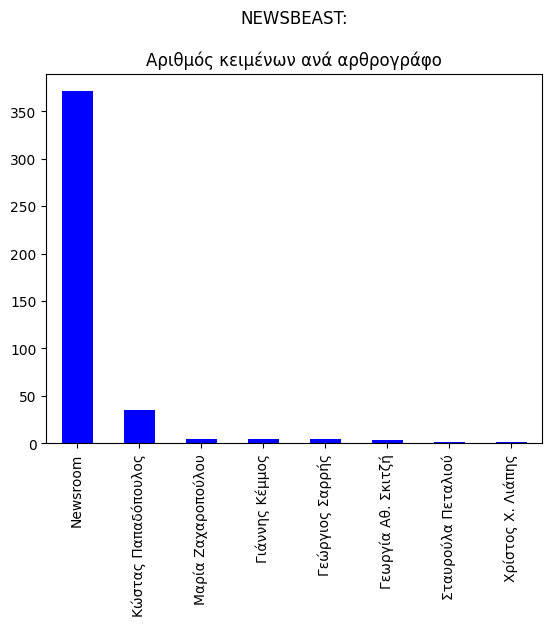

In [14]:
short_df['Author'].value_counts().plot(kind='bar', title= 'NEWSBEAST:\n\nΑριθμός κειμένων ανά αρθρογράφο', color = 'b')

Αφαιρώ από το dataset όλες τις τιμές Newsroom στη στήλη Author

In [15]:
short_df.loc[short_df['Author'].str.contains('Newsroom', na=False), 'Author'] = np.nan

Παρουσιάζω μια πίτα που μας δείχνει τα άρθρα ανά Author




<Axes: title={'center': 'NEWSBEAST:\n\nΑριθμός κειμένων ανά αρθρογράφο'}, ylabel='Author'>

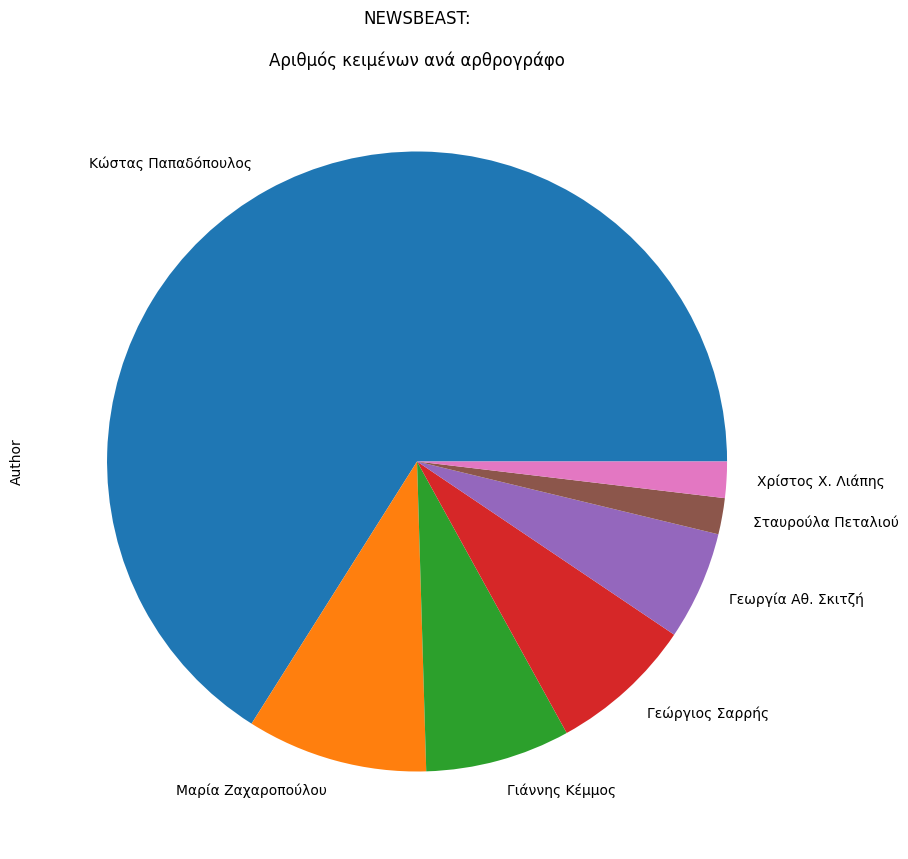

In [16]:
short_df['Author'].value_counts().plot(kind='pie', title= 'NEWSBEAST:\n\nΑριθμός κειμένων ανά αρθρογράφο', figsize=(10,14))

<Axes: title={'center': 'NEWSBEAST:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

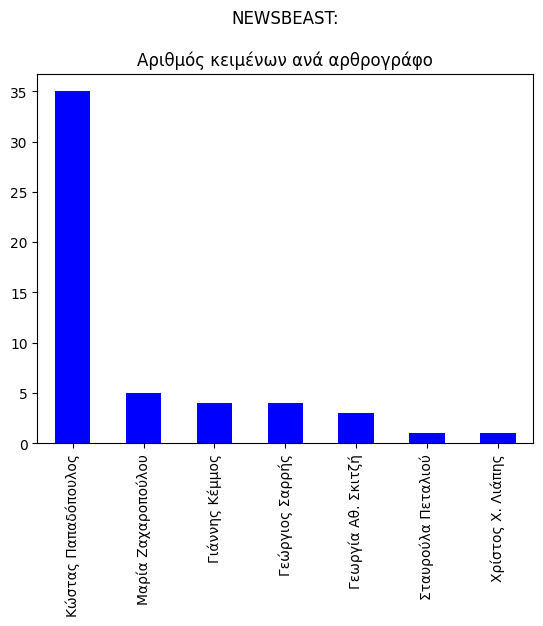

In [17]:
short_df['Author'].value_counts().plot(kind='bar', title= 'NEWSBEAST:\n\nΑριθμός κειμένων ανά αρθρογράφο', color = 'b')

Εξάγω τις λέξεις που περιλαμβάνουν μόνο κεφαλαία γράμματα από τη στήλη Title

In [18]:
data = []

for row in short_df['Title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_title'] = data

<Axes: title={'center': 'NEWSBEAST:\n\nΆθροισμα τίτλων ανά τον αριθμό από λέξεις με κεφαλαία γράμματα'}>

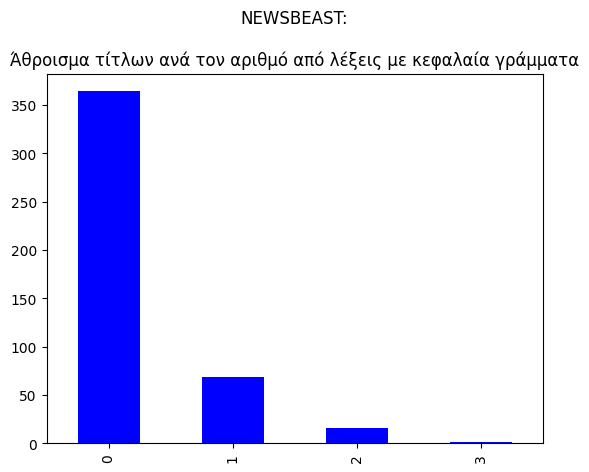

In [19]:
short_df['upper_title'].value_counts().plot(kind='bar', title='NEWSBEAST:\n\nΆθροισμα τίτλων ανά τον αριθμό από λέξεις με κεφαλαία γράμματα', color = 'b')

Εξάγω τις λέξεις που περιλαμβάνουν μόνο κεφαλαία γράμματα από τη στήλη Article_Content

In [20]:
data = []

for row in short_df['Article_content']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_text'] = data

<Axes: title={'center': 'NEWSBEAST:\n\nΆθροισμα άρθρων με κεφαλαίες λέξεις ανά ημέρα'}>

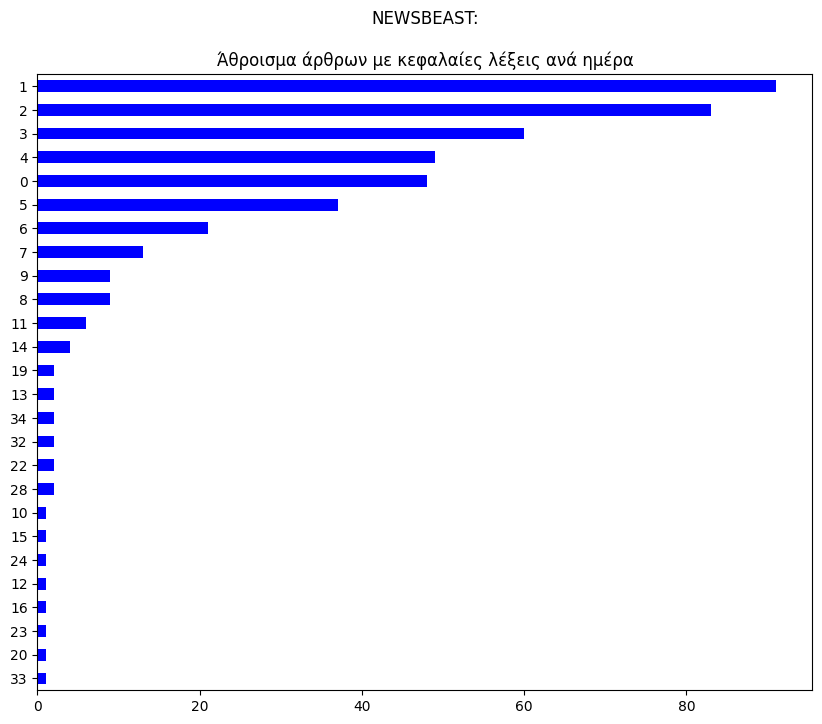

In [21]:
short_df['upper_text'].value_counts(ascending=True).plot(kind='barh', title= 'NEWSBEAST:\n\nΆθροισμα άρθρων με κεφαλαίες λέξεις ανά ημέρα', figsize=(10,8), color = 'b')

<Axes: title={'center': 'NEWSBEAST:\n\nΑριθμός άρθρων που περιέχουν μέσα'}>

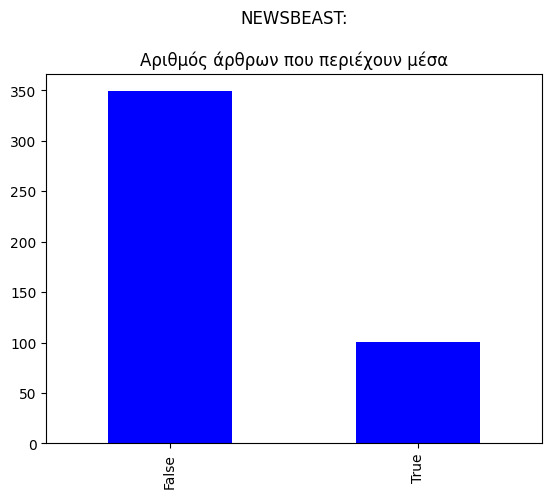

In [22]:
short_df['Media'].value_counts().plot(kind='bar', title= 'NEWSBEAST:\n\nΑριθμός άρθρων που περιέχουν μέσα', color = 'b')

TypeError: ignored

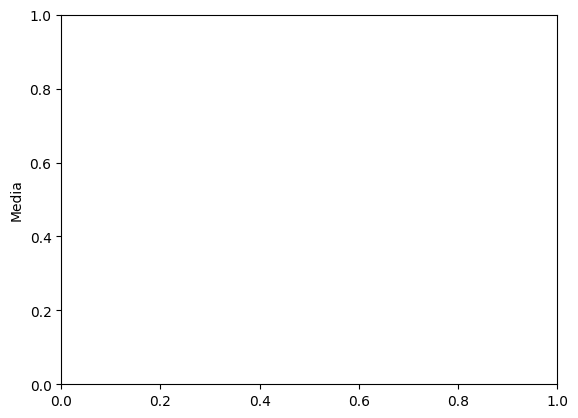

In [23]:
short_df['Media'].value_counts().plot(kind='pie', title = 'NEWSBEAST:\n\nΑριθμός άρθρων που περιέχουν μέσα', color = 'b')

In [24]:
import spacy

In [25]:
# !python -m spacy download el_core_news_sm

2023-11-12 10:48:15.522332: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 10:48:15.522400: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 10:48:15.522447: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 10:48:16.802671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 80.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [26]:
nlp = spacy.load('el_core_news_sm')

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
from wordcloud import WordCloud, STOPWORDS
import spacy

In [29]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [30]:
results.sum(axis =0).sort_values(ascending = False)

νέα φιλαδέλφεια            180
σύμφωνα πληροφορίες        102
ντιναμό ζάγκρεμπ            56
000 ευρώ                    40
δολοφονία 29χρονου          34
ποινική δίωξη               32
κροατών χούλιγκαν           32
αλέξης κούγιας              31
αστυνομικό τμήμα            31
εγκληματική οργάνωση        31
δελτίο ειδήσεων             30
μιχάλη κατσούρη             29
αστυνομικές αρχές           28
σχηματίστηκε δικογραφία     26
σύμφωνα ρεπορτάζ            26
οπαδού αεκ                  25
επεισόδια νέα               25
γήπεδο αεκ                  24
βράδυ δευτέρας              24
29χρονου μιχάλη             23
dtype: int64

In [31]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

νέα φιλαδέλφεια        180
σύμφωνα πληροφορίες    102
ντιναμό ζάγκρεμπ        56
000 ευρώ                40
δολοφονία 29χρονου      34
dtype: int64

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_df['text'])

results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

Παρουσιάζω τον βαθμό ομοιότητας των 10 πρώτων άρθρων

<Axes: title={'center': 'NEWSBEAST:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων'}>

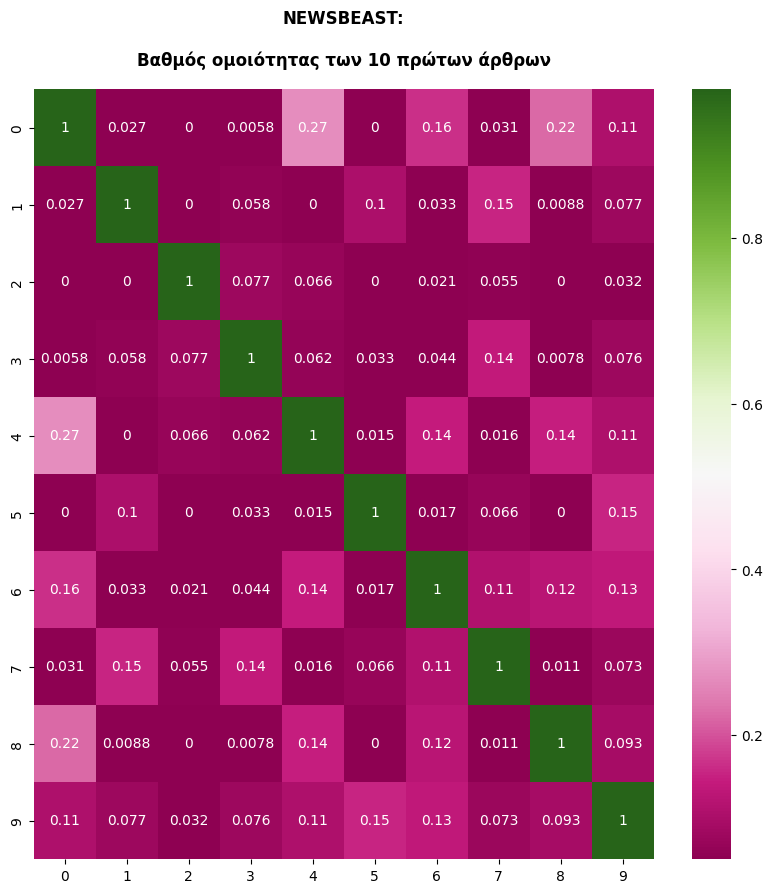

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title('NEWSBEAST:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")

# Sentiment Analysis σε κείμενα

In [34]:
filepath ='https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv'

In [35]:
emolex_df = pd.read_csv(filepath)

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [36]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [37]:
matrix = vec.fit_transform(short_df['Article_content'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

Προσθέτουμε σε νέο dataframe μια στήλη ανά συναίσθημα. Κάθε γραμμή της στήλης θα δείχνει το πόσες λέξεις που εκπροσωπούν το εκάστοτε συναίσθημα περιέχονται στο κείμενο του άρθρου

In [38]:
text_emot = short_df

text_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
text_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
text_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
text_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
text_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
text_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
text_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
text_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
text_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
text_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

text_emot.reset_index(inplace=True)
text_emot.set_index('date', inplace=True)

Παρουσιάζω τον μέσο αριθμό λέξεων που αποτελούνται τα άρθρα της κάθε μέρας

<Axes: title={'center': 'NEWSBEAST:\n\nΜέσος όρος λέξεων στο κείμενο ανά ημέρα'}, xlabel='date'>

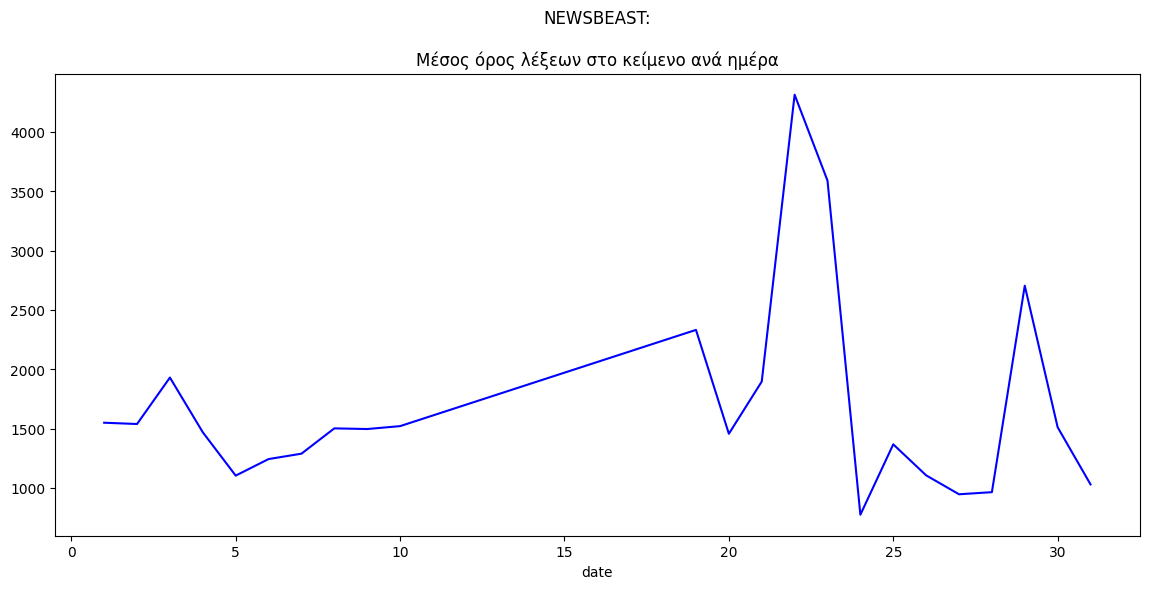

In [39]:
short_df['Article_content'].str.len().groupby(by=short_df.index.day).mean().plot(color="b", title='NEWSBEAST:\n\nΜέσος όρος λέξεων στο κείμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'NEWSBEAST:\n\nΜέσος αριθμός λέξεων στο κείμενο ανά ημέρα'}, xlabel='date'>

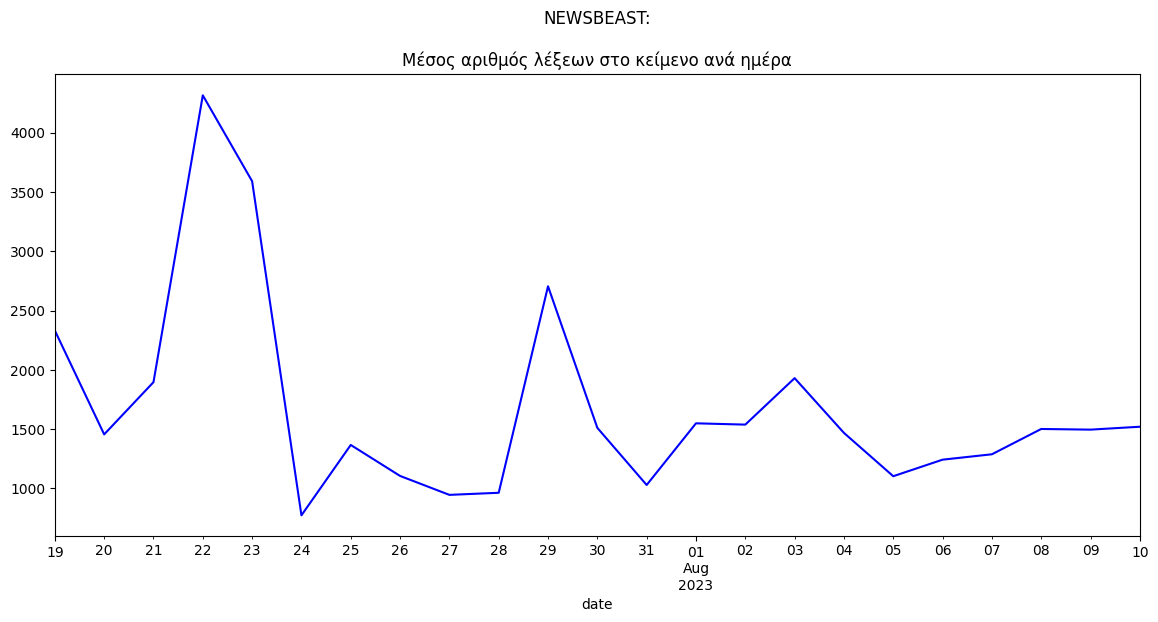

In [40]:
short_df['Article_content'].str.len().resample('D').mean().plot(color="b",title= 'NEWSBEAST:\n\nΜέσος αριθμός λέξεων στο κείμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'NEWSBEAST:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα'}, xlabel='date'>

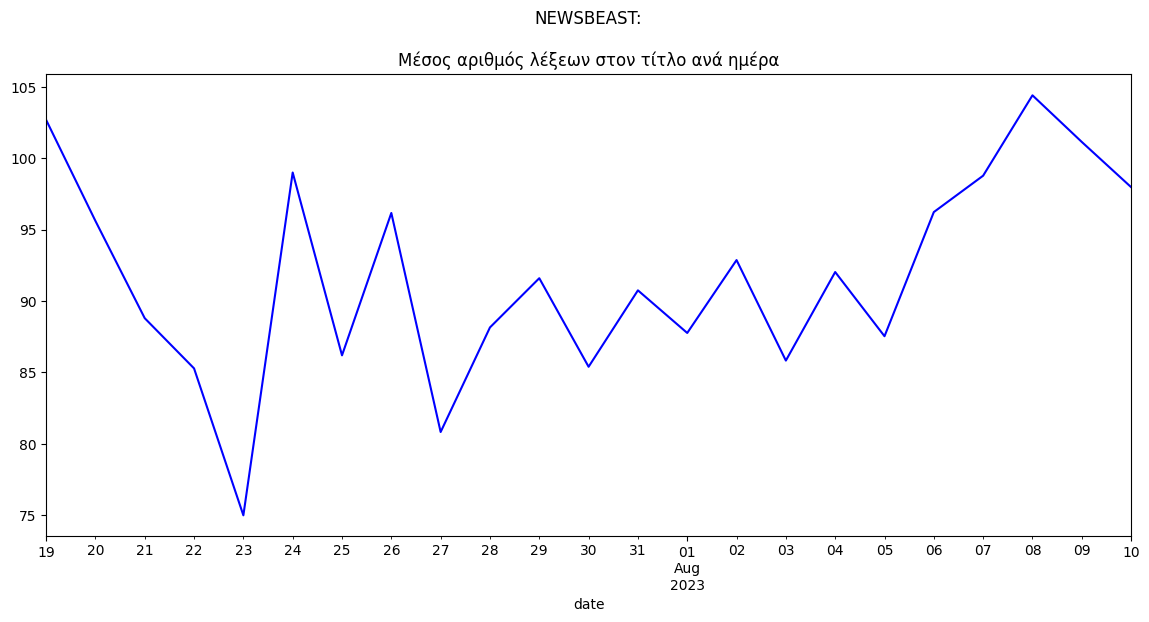

In [41]:
short_df['Title'].str.len().resample('D').mean().plot(color="b", title='NEWSBEAST:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα',figsize=(14,6))

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα εκνευρισμού και ευτυχίας που δημοσιεύτηκαν σε άρθρα ανά ημέρα

<Axes: title={'center': 'NEWSBEAST:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε κείμενο ανά ημέρα'}, xlabel='date'>

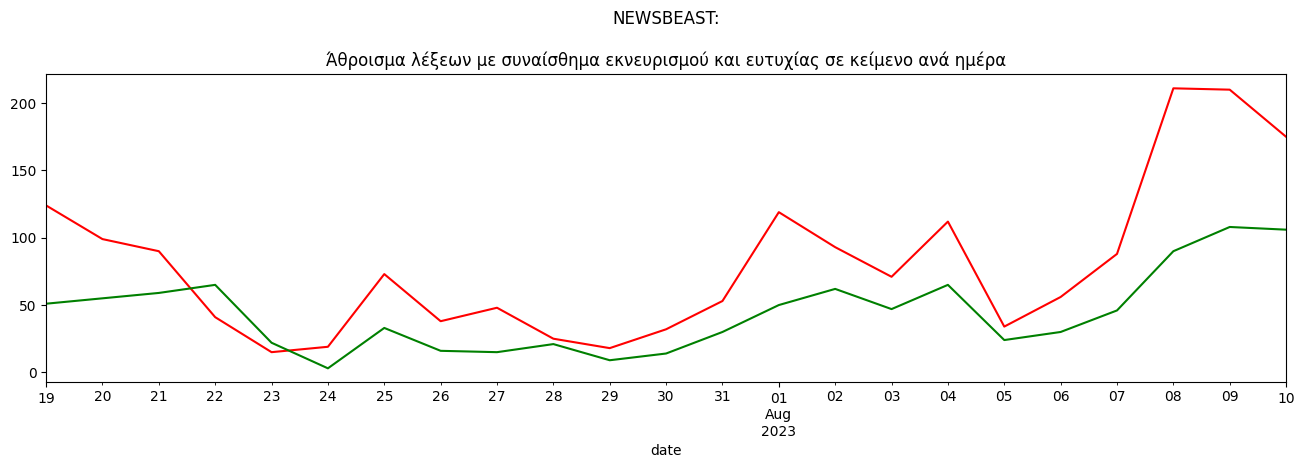

In [ ]:
ax = text_emot['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
text_emot['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'NEWSBEAST:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε κείμενο ανά ημέρα')

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε άρθρα ανά ημέρα

<Axes: title={'center': 'NEWSBEAST:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε κείμενο ανά ημέρα'}, xlabel='date'>

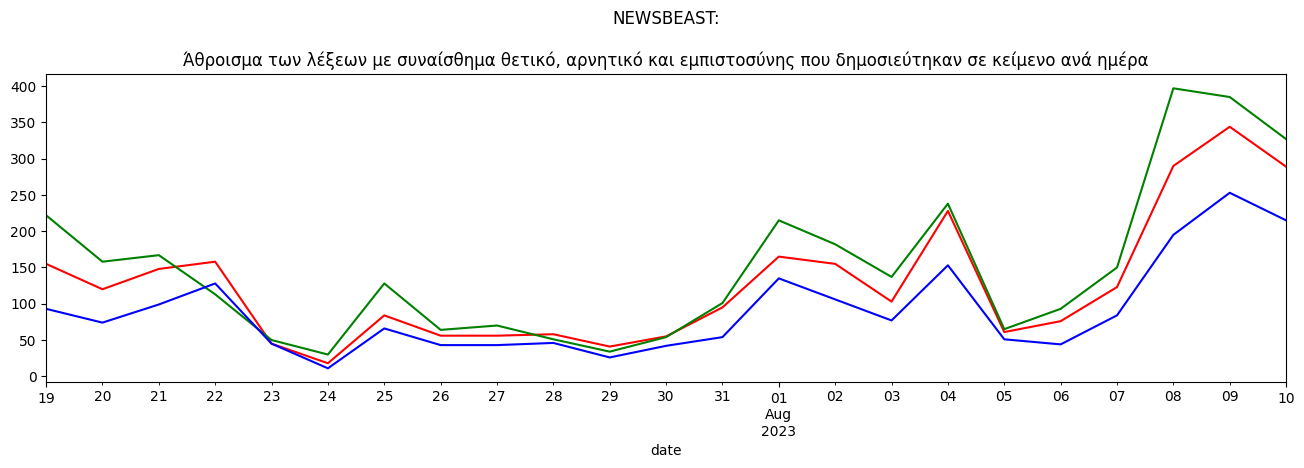

In [ ]:
ax = text_emot['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
text_emot['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
text_emot['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue', title='NEWSBEAST:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε κείμενο ανά ημέρα')

# Sentiment Analysis σε τίτλους

In [42]:
matrix = vec.fit_transform(short_df['Title'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [43]:
title_emot = short_df

title_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
title_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
title_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
title_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
title_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
title_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
title_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
title_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
title_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
title_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

In [44]:
title_emot.reset_index(inplace=True)
title_emot.set_index('date', inplace=True)

<Axes: title={'center': 'NEWSBEAST:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε τίτλο ανά ημέρα'}, xlabel='date'>

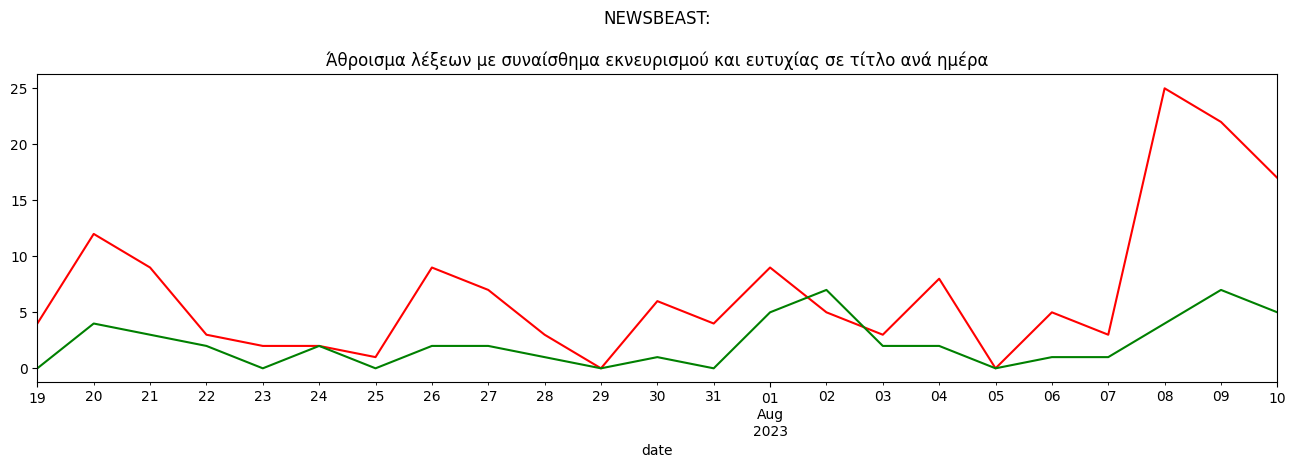

In [ ]:
ax = title_emot['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'NEWSBEAST:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε τίτλο ανά ημέρα')

<Axes: title={'center': 'NEWSBEAST:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε τίτλο ανά ημέρα'}, xlabel='date'>

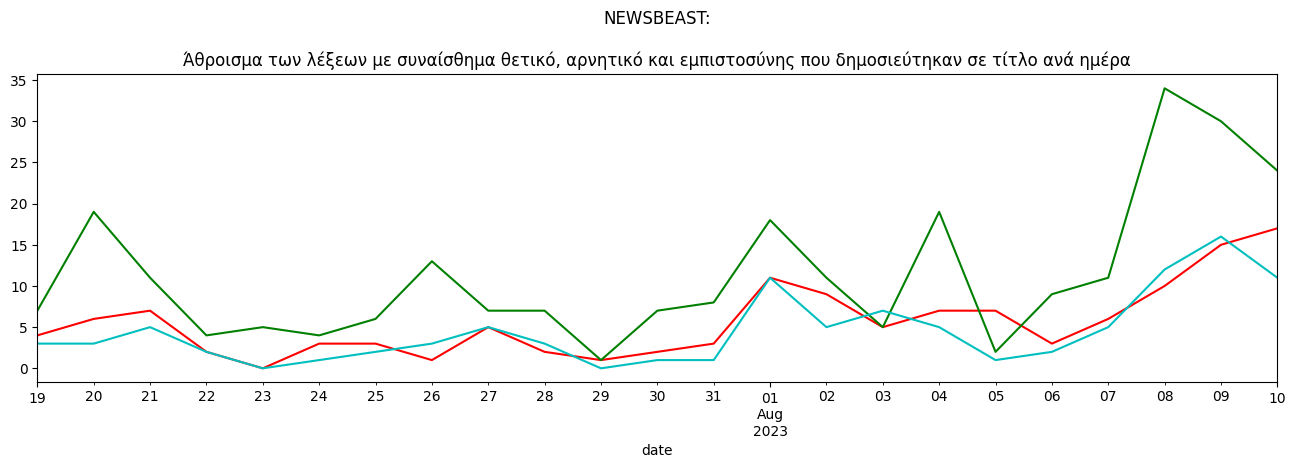

In [ ]:
ax_title = title_emot['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'green')
title_emot['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'c',title='NEWSBEAST:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε τίτλο ανά ημέρα')

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στα κείμενα των άρθρων

In [45]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []
for text in short_df['Article_content']:

  words = text.split()

  count_punctuation = 0
  for word in words:
    count_punctuation += count(word,set(string.punctuation))

  data.append(count_punctuation)

short_df['punctuations_text'] = data

<Axes: title={'center': 'NEWSBEAST:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα'}, xlabel='Day'>

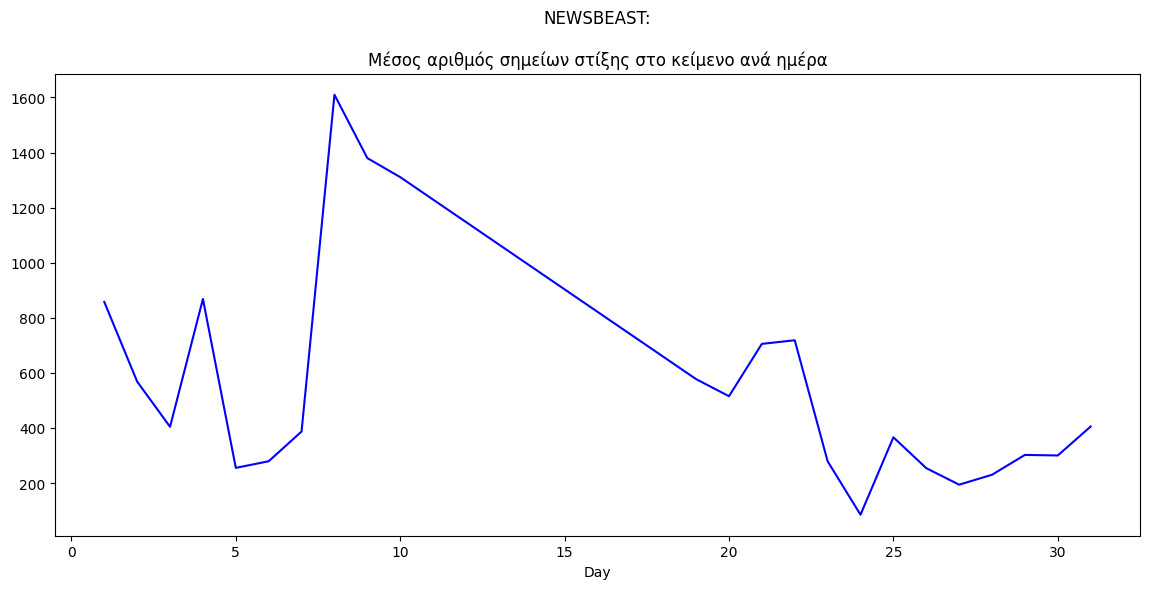

In [46]:
short_df['punctuations_text'].groupby(by=short_df.Day).sum().plot(color="b",title='NEWSBEAST:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'NEWSBEAST:\n\nΜέσος όρος σημείων στίξης στο κείμενο ανά ημέρα'}, xlabel='Day'>

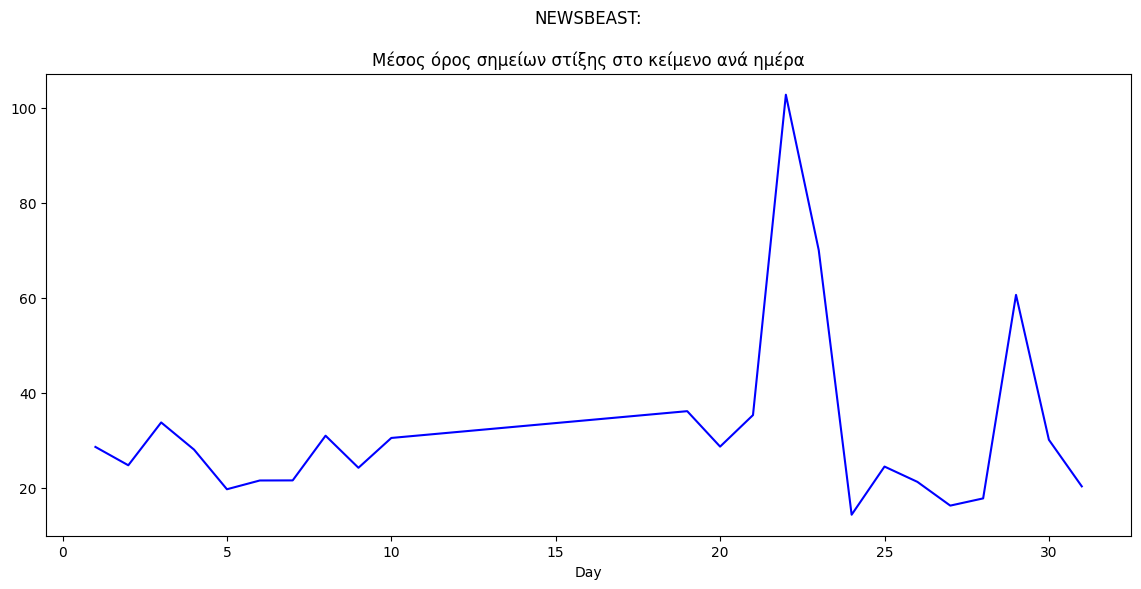

In [47]:
short_df['punctuations_text'].groupby(by=short_df.Day).mean().plot(color="b",title='NEWSBEAST:\n\nΜέσος όρος σημείων στίξης στο κείμενο ανά ημέρα',figsize=(14,6))

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στους τίτλους των άρθρων

In [48]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []

for row in short_df['Title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(count(word,set(string.punctuation)) for word in words))

short_df['punctuations_title'] = data

<Axes: title={'center': 'NEWSBEAST:\n\nΜέσος αριθμός σημείων στίξης σε τίτλο ανά ημέρα'}, xlabel='date'>

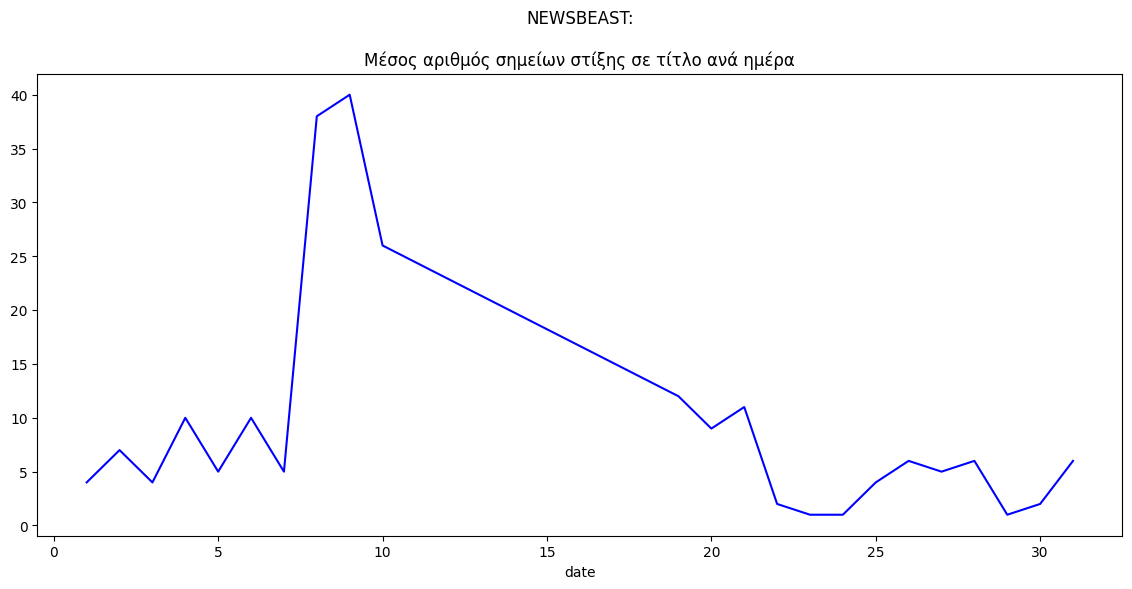

In [49]:
short_df['punctuations_title'].groupby(by=short_df.index.day).sum().plot(color="b",title='NEWSBEAST:\n\nΜέσος αριθμός σημείων στίξης σε τίτλο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'NEWSBEAST:\n\nΜέσος όρος σημείων στίξης σε τίτλο ανά ημέρα'}, xlabel='date'>

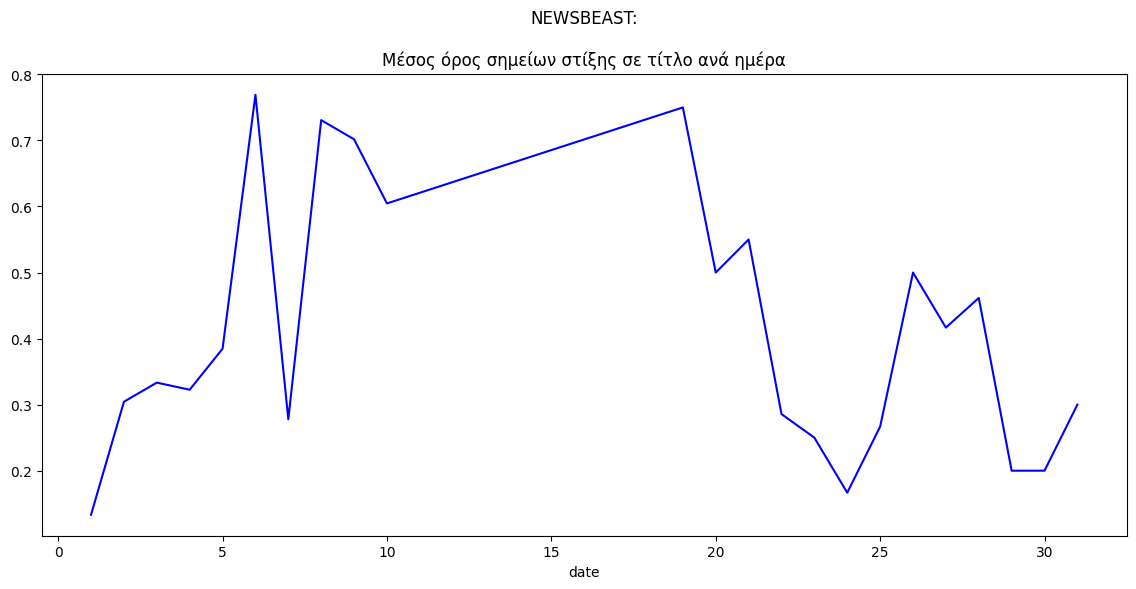

In [50]:
short_df['punctuations_title'].groupby(by=short_df.index.day).mean().plot(color="b",title='NEWSBEAST:\n\nΜέσος όρος σημείων στίξης σε τίτλο ανά ημέρα',figsize=(14,6))

In [ ]:
short_df.to_csv("drive/MyDrive/short_newsbeast.csv", index=False)